<div style="
    display: inline-block;
    border-radius: 10px;
    background: linear-gradient(135deg, #8268AB, #D989B8, #8268AB);
    font-size: 2rem;
    color: white;
    font-weight: 700;
    padding: 15px 30px;
    text-align: center;
    border: none;
    box-shadow: 0 8px 20px rgba(0,0,0,0.25);
    letter-spacing: 1px;
    text-shadow: 1px 1px 3px rgba(0,0,0,0.4);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
">
    🎵 Mexicali Housing Prices 📊🔥
</div>

<div style="
    display: inline-block;
    border-radius: 50px;
    background: linear-gradient(130deg, #7D93B0, #9DC2BE);
    color: white;
    padding: 10px 25px;
    font-size: 0.95rem;
    font-weight: 600;
    box-shadow: 0 4px 12px rgba(0,0,0,0.25);
    color: black;
">
   <b>1 |</b> Import libraries
</div>

In [27]:
import numpy as np
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.features import GeoJsonTooltip

<div style="
    display: inline-block;
    border-radius: 50px;
    background: linear-gradient(130deg, #7D93B0, #9DC2BE);
    color: white;
    padding: 10px 25px;
    font-size: 0.95rem;
    font-weight: 600;
    box-shadow: 0 4px 12px rgba(0,0,0,0.25);
    color: black;
">
   <b>2 |</b> Read files
</div>

In [28]:
pd.set_option('display.float_format', '{:.2f}'.format)

#df = pd.read_csv(r'/kaggle/input/mexicali-housing-prices/houses.csv')
#mxl_map = gpd.read_file('/kaggle/input/mexicali-housing-prices/mxl.shp', engine='pyogrio')

df = pd.read_csv('houses.csv')
mxl_map = gpd.read_file('mxl.shp', engine='pyogrio')

<div style="
    display: inline-block;
    border-radius: 50px;
    background: linear-gradient(130deg, #7D93B0, #9DC2BE);
    color: white;
    padding: 10px 25px;
    font-size: 0.95rem;
    font-weight: 600;
    box-shadow: 0 4px 12px rgba(0,0,0,0.25);
    color: black;
">
   <b>3 |</b> Exploration
</div>

In [29]:
mxl_map.head()

,D_CODIGO,POBLACION,area_m2,geometry
0,21250,15451.96,2031284.19,"POLYGON ((-115.41853 32.63812, -115.41906 32.6..."
1,21185,3546.36,484093.83,"POLYGON ((-115.50772 32.62498, -115.50774 32.6..."
2,21299,590.99,85988.14,"POLYGON ((-115.41422 32.63407, -115.41608 32.6..."
3,21200,5502.60,1557863.29,"POLYGON ((-115.45257 32.66733, -115.45004 32.6..."
4,21376,3595.74,4243449.29,"POLYGON ((-115.3777 32.63836, -115.37763 32.63..."


In [30]:
mxl_map.describe()

,D_CODIGO,POBLACION,area_m2
count,97.00,97.00,97.00
mean,21253.80,8295.20,2242673.29
std,123.31,14631.79,3192808.16
min,21000.00,207.16,62296.21
25%,21165.00,1992.73,505534.66
50%,21258.00,4725.56,1491854.21
75%,21353.00,9052.89,2675436.66
max,21620.00,126689.43,26798546.84


In [31]:
mxl_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   D_CODIGO   97 non-null     int32   
 1   POBLACION  97 non-null     float64 
 2   area_m2    97 non-null     float64 
 3   geometry   97 non-null     geometry
dtypes: float64(2), geometry(1), int32(1)
memory usage: 2.8 KB


In [32]:
df_mxl_map = mxl_map.rename(columns={'D_CODIGO':'zip_code',
                        'POBLACION':'population',
                        'area_m2':'area_km2'})

df_mxl_map['area_km2'] = df_mxl_map['area_km2']/1000000
df_mxl_map['density']=df_mxl_map['population']/df_mxl_map['area_km2']
df_mxl_map['zip_code'] = df_mxl_map['zip_code'].astype(str)

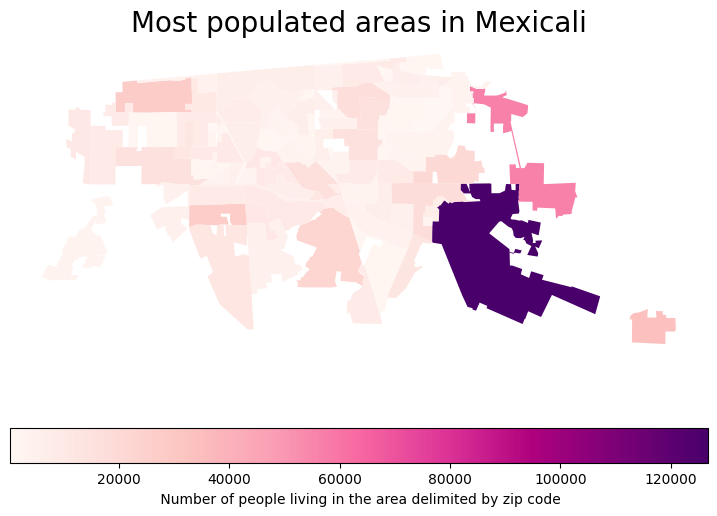

In [33]:
fig, ax = plt.subplots(figsize=(9,6))

df_mxl_map.plot(column='population', cmap='RdPu', edgecolor=None,
                legend=True, legend_kwds={'label': ' Number of people living in the area delimited by zip code', 'orientation': 'horizontal'}, ax=ax)

ax.set_title('Most populated areas in Mexicali', fontsize=20)
ax.axis('off')
#plt.savefig("mapa_habitantes_mexicali.png", format='png', dpi=200, bbox_inches='tight')
plt.show()

In [34]:
df.head()

,codigo_postal,tipo,localidad,precio(mxn_peso),habitaciones,baños,area(m2)
0,21395,Fraccionamiento,Villa Toledo,4350000,3,3,172
1,21399,Fraccionamiento,Nuevo Mexicali,2910000,3,2,115
2,21395,Fraccionamiento,Bugambilias,380000,2,1,120
3,21384,Fraccionamiento,Valle de Puebla 2da. Sección,1250000,2,1,61
4,21323,Fraccionamiento,Residencial Barcelona II,850000,3,2,170


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   codigo_postal     940 non-null    int64 
 1   tipo              940 non-null    object
 2   localidad         940 non-null    object
 3   precio(mxn_peso)  940 non-null    int64 
 4   habitaciones      940 non-null    int64 
 5   baños             940 non-null    int64 
 6   area(m2)          940 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 51.5+ KB


In [36]:
df['codigo_postal'] = df['codigo_postal'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   codigo_postal     940 non-null    object
 1   tipo              940 non-null    object
 2   localidad         940 non-null    object
 3   precio(mxn_peso)  940 non-null    int64 
 4   habitaciones      940 non-null    int64 
 5   baños             940 non-null    int64 
 6   area(m2)          940 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 51.5+ KB


In [37]:
df.isnull().sum()

codigo_postal       0
tipo                0
localidad           0
precio(mxn_peso)    0
habitaciones        0
baños               0
area(m2)            0
dtype: int64

In [38]:
for x in 'codigo_postal', 'localidad':
    print(f"{x} values: {df[x].unique()}\n")

codigo_postal values: ['21395' '21399' '21384' '21323' '21376' '21353' '21290' '21620' '21360'
 '21297' '21270' '21379' '21255' '21210' '21030' '21355' '21180' '21254'
 '21258' '21225' '21600' '21120' '21298' '21000' '21383' '21378' '21396'
 '21230' '21240' '21100' '21138' '21190' '21740' '21226' '21354' '21339'
 '21387' '21280' '21338' '21370' '21188' '21320' '21327' '21260' '21200'
 '21730' '21217' '21010' '21224' '21350' '21307' '21040' '21386' '21700'
 '21140' '21389' '21309' '21356' '21250' '21038' '21020' '21257' '21079'
 '21165' '21137' '21330' '21135' '21215' '21394' '21130' '21050' '21960'
 '21139' '21970' '21397' '21160' '21850' '21220' '21738' '21300' '21170'
 '21380' '21821' '21910' '21285' '21060' '21219' '21337']

localidad values: ['Villa Toledo' 'Nuevo Mexicali' 'Bugambilias'
 'Valle de Puebla 2da. Sección' 'Residencial Barcelona II' 'Verona'
 'Villa del Rey Tercera Etapa' 'Ampliación Independencia'
 'Valle del Puebla' 'Hechicera' 'Las Palmas' 'San Fernando' 'Gran Venec

In [39]:
df = df.rename(columns={'codigo_postal':'zip_code',
                'precio(mxn_peso)':'price(mxn)'})

In [40]:
df.describe(include='all')

,zip_code,tipo,localidad,price(mxn),habitaciones,baños,area(m2)
count,940,940,940,940.00,940.00,940.00,940.00
unique,88,3,283,NaN,NaN,NaN,NaN
top,21395,Fraccionamiento,Privadas Campestre,NaN,NaN,NaN,NaN
freq,88,657,19,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3962253.86,2.90,1.95,156.19
std,NaN,NaN,NaN,2898012.78,0.70,0.77,85.80
min,NaN,NaN,NaN,123456.00,1.00,1.00,35.00
25%,NaN,NaN,NaN,1996000.00,3.00,1.00,99.00
50%,NaN,NaN,NaN,3325000.00,3.00,2.00,134.00
75%,NaN,NaN,NaN,5100000.00,3.00,2.00,193.00


In [41]:
df['price_m2'] = df['price(mxn)']/df['area(m2)']

In [42]:
df_m = df.groupby('zip_code').agg({
    'price(mxn)':['mean'], #avg price
    'price_m2':['mean'], #price for m2
    'zip_code':['value_counts'] #for sale houses in the zip_code
})

df_m.columns=['avg_price','price_m2','houses_for_sale']
df_m.reset_index(inplace=True)

In [43]:
df_mxl_map_f = df_mxl_map.drop('population', axis=1)
df_mxl_map_f = pd.merge(df_mxl_map_f , df_m, on='zip_code')
df_mxl_map_f['avg_price']=df_mxl_map_f['avg_price']/1000000

In [44]:
df_mxl_map_f.head()

,zip_code,area_km2,geometry,density,avg_price,price_m2,houses_for_sale
0,21250,2.03,"POLYGON ((-115.41853 32.63812, -115.41906 32.6...",7606.99,4.04,22318.33,8
1,21200,1.56,"POLYGON ((-115.45257 32.66733, -115.45004 32.6...",3532.15,4.95,23912.75,14
2,21376,4.24,"POLYGON ((-115.3777 32.63836, -115.37763 32.63...",847.36,4.96,29107.79,55
3,21170,0.64,"MULTIPOLYGON (((-115.50562 32.64095, -115.5043...",3671.34,2.60,15840.94,2
4,21337,0.68,"POLYGON ((-115.51433 32.614, -115.51423 32.614...",6886.77,2.67,15711.76,1


In [45]:
map_precio = folium.Map(location=[32.64, -115.45], zoom_start=12, tiles="cartodbpositron")
folium.Choropleth(
    geo_data=df_mxl_map_f,
    data=df_mxl_map_f,
    columns=["zip_code", "price_m2"],
    key_on="feature.properties.zip_code",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="Price by m² (MXN)"
).add_to(map_precio)

# map_precio.save("mapa_zonas_caras.html")
map_precio

In [46]:
# =========================
# 2️⃣ MAPA DENSIDAD vs PRECIO
# =========================
map_densidad_precio = folium.Map(location=[32.64, -115.45], zoom_start=12, tiles="cartodbpositron")

for _, row in df_mxl_map_f.iterrows():
    folium.CircleMarker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        radius=max(4, row["price_m2"] / 5000),  # escala por precio
        color="blue",
        fill=True,
        fill_opacity=0.6,
        popup=f"<b>CP:</b> {row.zip_code}<br>"
            f"Density: {row.density:,.0f} hab/km²<br>"
            f"Price m²: ${row.price_m2:,.0f}"
    ).add_to(map_densidad_precio)

# map_densidad_precio.save("mapa_densidad_vs_precio.html")
map_densidad_precio

In [47]:
# =========================
# 3️⃣ MAPA HOTSPOTS CASAS EN VENTA
# =========================
map_hotspots = folium.Map(location=[32.64, -115.45], zoom_start=12, tiles="cartodbpositron")

for _, row in df_mxl_map_f.iterrows():
    folium.Circle(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        radius=row["houses_for_sale"] * 50,  # escala proporcional
        color="red",
        fill=True,
        fill_opacity=0.3,
        popup=f"<b>CP:</b> {row.zip_code}<br>"
            f"Houses for sale: {row.houses_for_sale}"
    ).add_to(map_hotspots)

# map_hotspots.save("mapa_hotspots_casas.html")
map_hotspots

In [48]:
# =========================
# 2️⃣ MAPA INTERACTIVO CON TOOLTIP
# =========================
map_tooltip = folium.Map(location=[32.64, -115.45], zoom_start=12, tiles="cartodbpositron")

# Polígonos con tooltip
folium.GeoJson(
    df_mxl_map_f,
    style_function=lambda x: {
        "fillColor": "#6baed6",
        "color": "black",
        "weight": 0.8,
        "fillOpacity": 0.5
    },
    tooltip=GeoJsonTooltip(
        fields=["zip_code", "avg_price", "price_m2", "density", "houses_for_sale"],
        aliases=["CP:", "Precio medio (M MXN):", "Precio m²:", "Densidad hab/km²:", "Casas en venta:"],
        localize=True,
        sticky=True
    )
).add_to(map_tooltip)

#map_tooltip.save("mapa_tooltip.html")
map_tooltip

In [49]:
top_areas = df_mxl_map_f.nlargest(5, "price_m2")

map_top_price = folium.Map(location=[32.64, -115.45], zoom_start=12, tiles="cartodbpositron")

folium.GeoJson(
    df_mxl_map_f,
    style_function=lambda x: {"fillColor": "#d9d9d9", "color": "black", "weight": 0.5, "fillOpacity": 0.2}
).add_to(map_top_price)

folium.GeoJson(
    top_areas,
    style_function=lambda x: {"fillColor": "#e31a1c", "color": "black", "weight": 1, "fillOpacity": 0.7},
    tooltip=GeoJsonTooltip(
        fields=["zip_code", "avg_price", "price_m2", "houses_for_sale"],
        aliases=["CP:", "Precio medio (M MXN):", "Precio m²:", "Casas en venta:"],
        localize=True,
        sticky=True
    )
).add_to(map_top_price)

#map_top_price.save("mapa_top_price_m2.html")
map_top_price